In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, lasso_path, enet_path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1 Effet de la régularisation ridge
Ce premier exercice vise à analyser l’effet de la régularisation ridge sur les paramètres du modèle linéaire résultant. Pour cela, nous allons générer un jeu de données synthétique et entraîner un modèle de régression linéaire régularisée pour différentes valeurs de λ.

**1. Générez un jeu de données synthétique avec la fonction make_regression de Scikit-learn :**

In [2]:
X, y, w = make_regression(n_samples =100, n_features =10, n_informative =8,
coef=True , random_state =42)

**2. À quoi correspondent les valeurs de w retournées par la fonction ? Observez ces valeurs et donnez votre analyse**

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    These are the coefficients of the linear model. We can see that the MSE provided by these coefficients is practically 0, which confirms that they are the correct coefficients to represent the original function.
  </p>
</div>

In [3]:
y_coef = X @ w

MSE = np.mean((y_coef-y)**2)

print(MSE)

2.5262481628797683e-28


**3. Créez un vecteur lambdas qui contient 100 valeurs, distribuées uniformément sur une échelle logarithmique entre $10^{−3}$ et $10^4$**

In [4]:
lambdas = np.logspace(-3, 4, num=100)

**4. En utilisant la classe Ridge, entraînez un modèle de régression linéaire régularisée pour chaque valeur de λ de lambdas, sur la totalité de données**

In [5]:
ridges = []
# coefs = []
for i in range(0,len(lambdas)):
    ridge = Ridge(alpha=lambdas[i])
    ridge.fit(X, y)
    ridges.append(ridge)

**5. Pour chacun de ces modèles :**
- **stockez toutes les valeurs de paramètres obtenues dans un tableau de taille 100 × 10**
- **calculez l’erreur absolue moyenne des paramètres par rapport à w**

In [11]:
coefs = []
errors_coefs = []
errors_coefs2 = []
for r in ridges:
    coefs.append(r.coef_)
    errors_coefs.append(mean_absolute_error(r.coef_ , w))
    errors_coefs2.append(mean_squared_error(r.coef_ , w))

**6. Affichez l’évolution des valeurs des paramètres en fonction de λ**

C:\Users\ferna\AppData\Local\Temp\ipykernel_16308\22054106.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


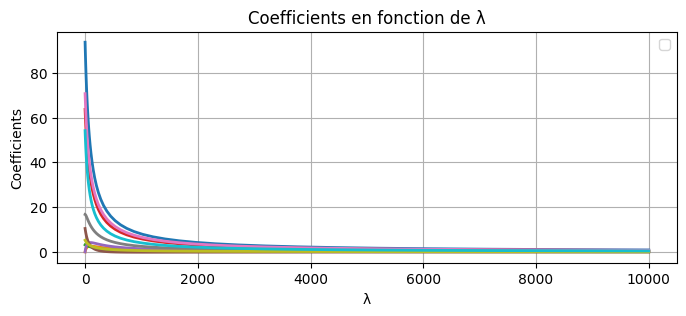

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(lambdas, coefs, linewidth=2)
plt.title("Coefficients en fonction de λ")
plt.xlabel("λ")
plt.ylabel("Coefficients")
plt.legend()
plt.grid(True)
plt.show()

**7. Affichez l’évolution de l’erreur absolue moyenne des paramètres en fonction de λ**

C:\Users\ferna\AppData\Local\Temp\ipykernel_21660\3443164066.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


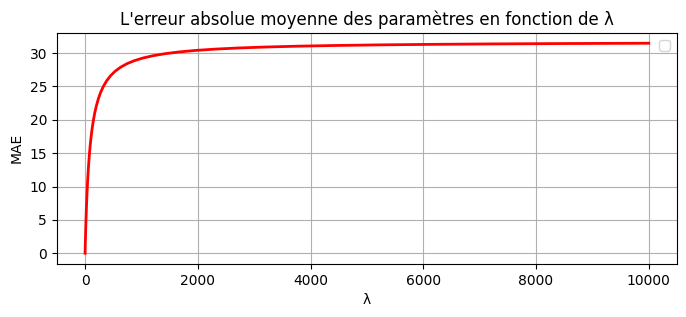

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(lambdas, errors_coefs, color="red", linewidth=2)
plt.title("L'erreur absolute moyenne des paramètres en fonction de λ")
plt.xlabel("λ")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

**8. Commentez les résultats obtenus**

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    We can see that smaller values of lambda result in larger coefficients. This happens because when lambda is small, the ridge correction does not penalize the coefficient value much. It is worth noting that when the effect of regularization is not very strong, the model becomes more susceptible to overfitting. Additionally, the coefficients decrease significantly but are never reduced to zero.
  </p>
  <p>
    We can see that these small values were the ones that provided the lowest error, meaning that high lambda values reduce the coefficients so much that they decrease the model's ability to fit the function.
  </p>
</div>



### 2 Impact de la normalisation des données
Ce deuxième exercice vise à analyser l’impact de la normalisation des données sur les performances de la régression linéaire régularisée. Nous allons utiliser la base de données real_estate.csv disponible sur UniversiTICE, qui vise à prédire le prix au mètre carré de biens immobiliers en fonction de 6 caractéristiques qui décrivent ces biens.

**1. Chargez la base de données :**

In [13]:
df = pd.read_csv("real_estate.csv", delimiter=",")
df.drop(columns =["No"], inplace=True)
y = df["Y house price of unit area"]
X = df.drop(columns =["Y house price of unit area"])
df.head (10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [21]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


**2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

**3. Entraînez un modèle de régression ridge sur les données d’entraînement, en sélectionnant la valeur de λ par validation croisée à l’aide de la classe RidgeCV de Scikit-learn**

In [15]:
def Train_Pred_RidgeCV(x_train, y_train, x_test, lambdas):
    ridge = RidgeCV(alphas=lambdas).fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    print(f"Best lambda is {ridge.alpha_:.4f}")
    return y_pred

In [16]:
lambdas = np.logspace(-3, 4, num=100)
y_pred = Train_Pred_RidgeCV(x_train, y_train, x_test, lambdas)

Best lambda is 0.0037


**4. Calculez l’erreur quadratique moyenne (MSE) et le coefficient de détermination R2 du modèle obtenu, sur les données de test**

In [17]:
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")

MSE: 64.83
MAE: 5.88
R2: 0.59


**5. Normalisez les données avec la classe StandardScaler**

In [18]:
sc = StandardScaler(with_mean=True , with_std=True)
sc = sc.fit(x_train)
Xa_n = sc.transform(x_train)
Xt_n = sc.transform(x_test)

**6. Entraînez un modèle de régression ridge sur les données normalisées, avec la même procédure de validation croisée**

In [19]:
y_pred_n = Train_Pred_RidgeCV(Xa_n, y_train, Xt_n, lambdas)

Best lambda is 12.6186


**7. Calculez l’erreur quadratique moyenne et le coefficient de détermination R2 et comparez les résultats obtenus avec ceux obtenus sans normalisation**

In [20]:
print(f"MSE: {mean_squared_error(y_test, y_pred_n):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_n):.2f}")
print(f"R2: {r2_score(y_test, y_pred_n):.2f}")

MSE: 63.89
MAE: 5.85
R2: 0.60


**8. Commentez les résultats obtenus**

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Before normalization, a small alpha value was selected, indicating that there was little penalization in the function. The model’s results were not very satisfactory (R² of 0.59 and a high MSE, on the same scale as the y values).
  </p>
  <p>
    After normalization, the alpha value increased significantly. In the describe() table above, we observed that the features had very different scales, but after normalization, they were all standardized. This means that alpha no longer needs to be small, allowing for stronger regularization of the data.
  </p>
  <p>
    However, the validation metrics did not change significantly and still revealed unsatisfactory values.
  </p>
</div>

### 3 Régression LASSO
Scikit-learn fournit des outils spécifiques pour régler le paramètre de régularisation des modèles LASSO et Elastic-Net. Dans cet exercice, nous allons nous appuyer sur ces outils pour étudier les effets des régularisations `1 et `2 sur les paramètres du modèle. Nous proposons d’utiliser la base de données baseball_processed.csv disponible sur UniversiTICE. Cette base contient des informations sur des joueurs de baseball, et l’objectif est de prédire le salaire des joueurs en fonction de ces caractéristiques.

**1. Chargez la base de données :**

In [23]:
df = pd.read_csv("baseball_processed.csv", delimiter=",")
print(df.describe ())

         lnSalary      BatAVG      OnBase        Runs        Hits     Doubles  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     6.535420    0.257825    0.323973   46.697329   92.833828   16.673591   
std      1.176543    0.039546    0.047132   29.020166   51.896322   10.452001   
min      4.691348    0.063000    0.063000    0.000000    1.000000    0.000000   
25%      5.438079    0.238000    0.297000   22.000000   51.000000    9.000000   
50%      6.606650    0.260000    0.323000   41.000000   91.000000   15.000000   
75%      7.673223    0.281000    0.354000   69.000000  136.000000   23.000000   
max      8.716044    0.457000    0.486000  133.000000  216.000000   49.000000   

          Triples    HomeRuns         RBI       Walks  StrikeOuts  \
count  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     2.338279    9.097923   44.020772   35.017804   56.706231   
std      2.543336    9.289934   29.559406   24.842474   33.8287

**2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié**

In [24]:
y = df["lnSalary"]
X = df.drop(columns =["lnSalary"])
df.head (10)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

**3. Normalisez les données d’entraînement et de test avec la classe StandardScaler**

In [25]:
sc = StandardScaler(with_mean=True , with_std=True)
sc = sc.fit(x_train)
Xa_n = sc.transform(x_train)
Xt_n = sc.transform(x_test)

**4. Entraînez un modèle de régression LASSO sur les données d’entraînement normalisées, avec la classe Lasso de Scikit-learn, en utilisant la paramétrisation par défaut**


In [26]:
lasso = Lasso()
lasso.fit(Xa_n, y_train)
y_pred = lasso.predict(Xt_n)

**5. Observez les valeurs des coefficients obtenus :**

In [27]:
print(lasso.coef_)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.]
MSE: 1.34
MAE: 1.01
R2: -0.02


**6. Donnez votre analyse de ces valeurs**

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    All model coefficients were calculated as 0, meaning that Lasso eliminated all variables. This is incorrect because the predictions will be constant. This may have happened because the default alpha value is too high for this dataset.
  </p>
  <p>
    We can see that the R² result is very low, which confirms the inefficiency of this model.
  </p>
</div>





**7. Créez un vecteur lambdas qui contient 100 valeurs, distribuées uniformément sur une échelle
logarithmique entre 10−4 et 10**

In [29]:
lambdas = np.logspace(-3, 1, num=100)

**8. En utilisant la fonction lasso_path de Scikit-learn, entraînez un modèle de régression LASSO
pour chaque valeur de λ de lambdas :**

In [30]:
alphas_lasso , coefs_lasso , _ = lasso_path(Xa_n , y_train , alphas=lambdas)

**9. Que contiennent les variables alphas_lasso et coefs_lasso?**

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    The alphas_lasso are the alphas along the path where models are computed (the same as Lambdas) and coefs_lasso are the coefficients along that path for each of the alphas.
  </p>
</div>

**10. Affichez l’évolution des valeurs des paramètres en fonction de λ :**

Text(0.5, 1.0, 'Lasso path')

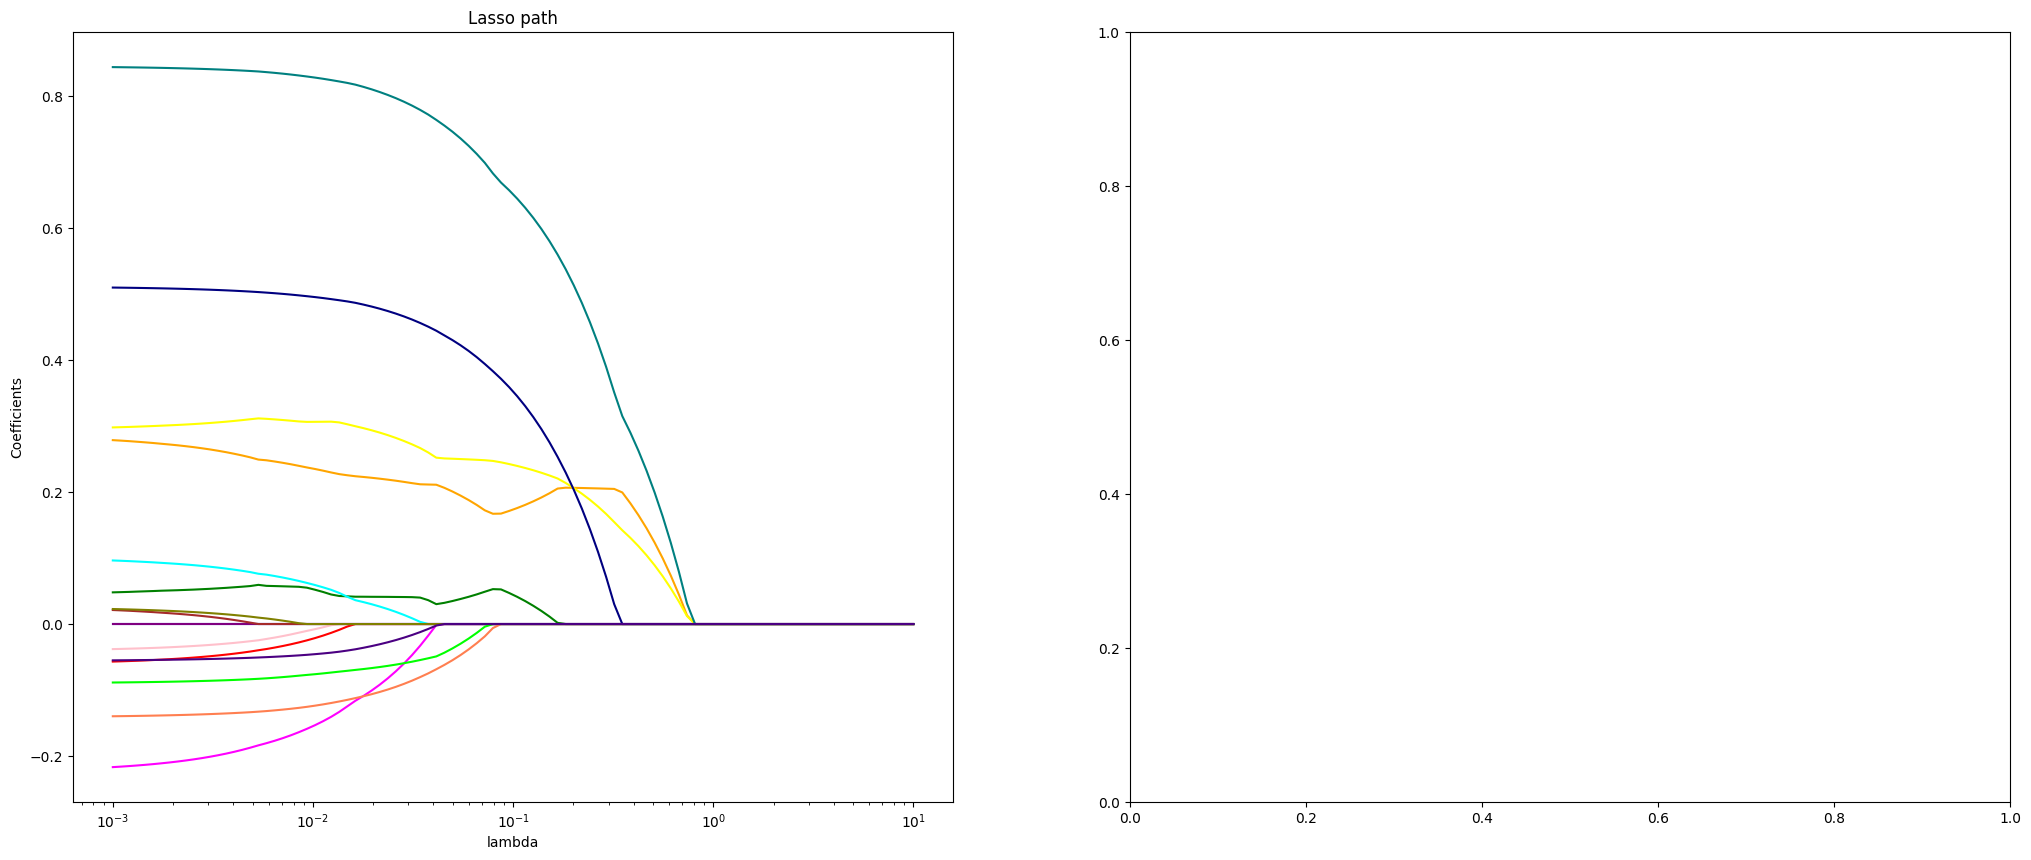

In [31]:
fig , axs = plt.subplots(1, 2, figsize =(25, 10)) # change the size if needed
# 16 different colors , one per coefficient:
colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
"cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]
for coef_l , c in zip(coefs_lasso , colors):
    axs[0].plot(alphas_lasso , coef_l , color=c)
    axs[0].set_xscale('log')
axs[0].set_xlabel('lambda')
axs[0].set_ylabel('Coefficients')
axs[0].set_title('Lasso path')


**11. Commentez les résultats obtenus**

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    As alpha increases, the coefficients are penalized until they become 0. Models with very few nonzero coefficients may indicate underfitting, as they become overly simplistic.
  </p>
</div>

**12. En suivant la même procédure, entraînez un modèle de régression Elastic-Net sur les données d’entraînement normalisées, avec la fonction enet_path de Scikit-learn**

In [32]:
alphas_enet , coefs_enet , _ = enet_path(Xa_n , y_train , alphas=lambdas)

**13. Affichez sur le graphique axs[1] l’évolution des paramètres des modèles LASSO et Elastic-Net en fonction de λ. Commentez les résultats obtenus**

Text(0.5, 1.0, 'Enet path')

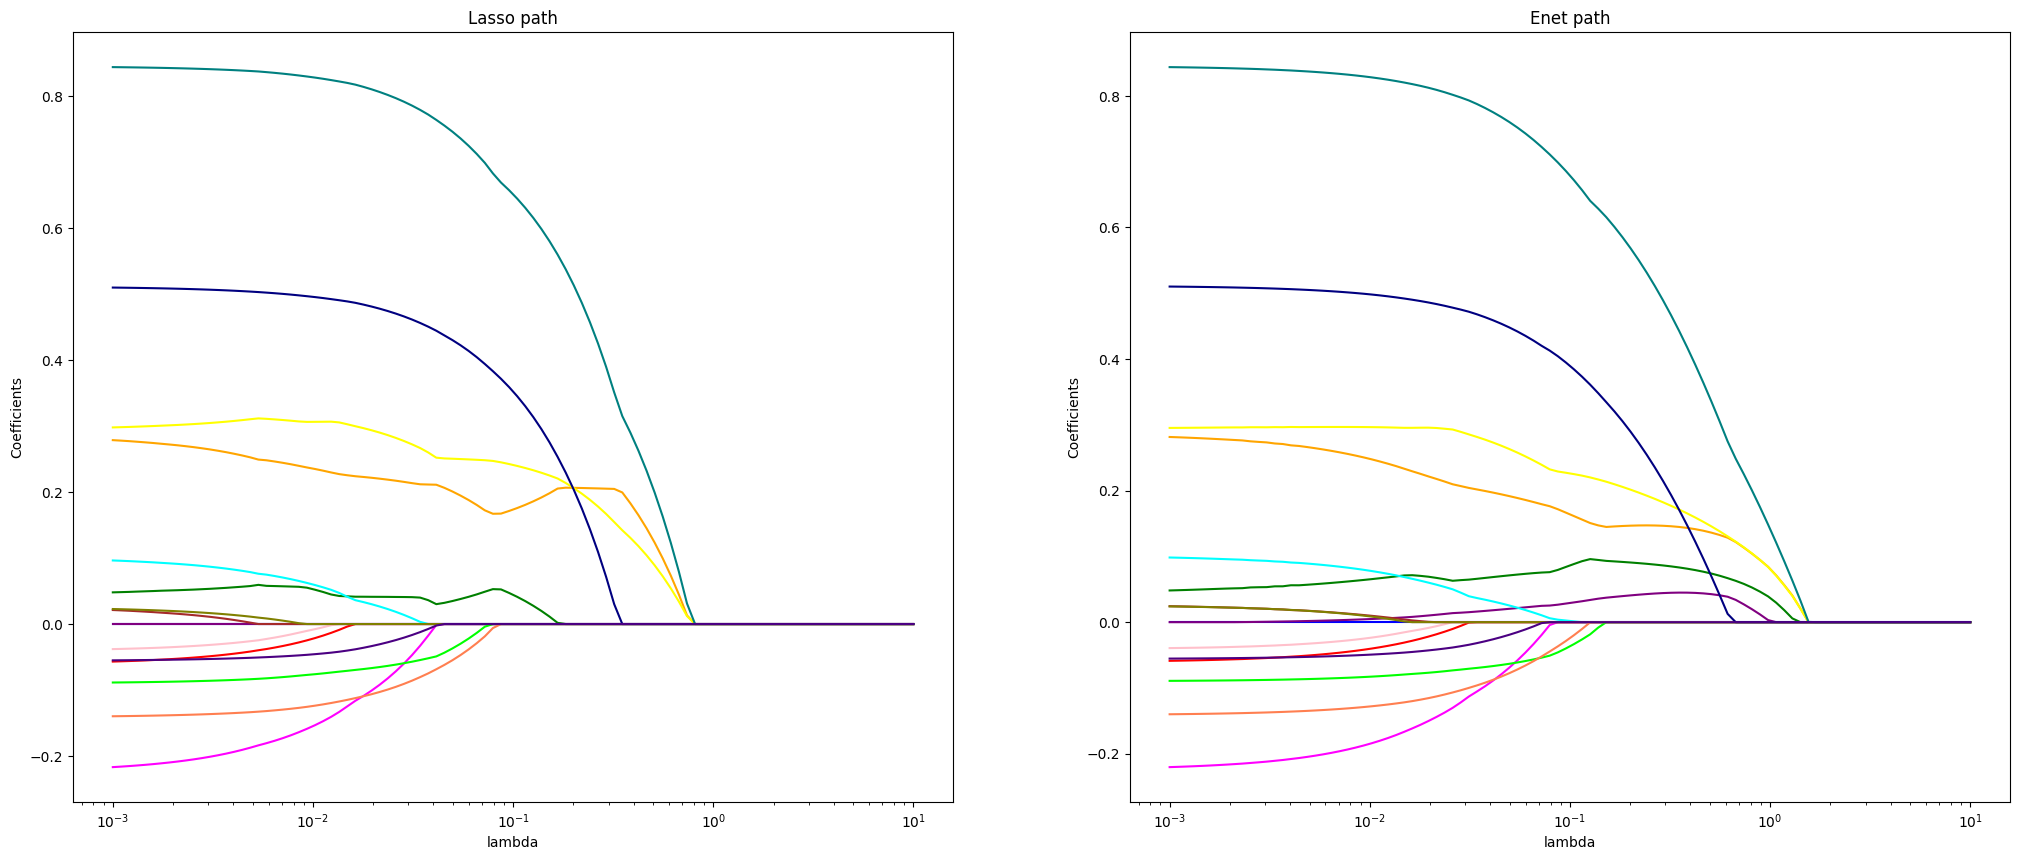

In [33]:
fig , axs = plt.subplots(1, 2, figsize =(25, 10)) # change the size if needed
# 16 different colors , one per coefficient:
colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
"cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]
for coef_l , c in zip(coefs_lasso , colors):
    axs[0].plot(alphas_lasso , coef_l , color=c)
    axs[0].set_xscale('log')
axs[0].set_xlabel('lambda')
axs[0].set_ylabel('Coefficients')
axs[0].set_title('Lasso path')

for coef_l , c in zip(coefs_enet , colors):
    axs[1].plot(alphas_enet , coef_l , color=c)
    axs[1].set_xscale('log')
axs[1].set_xlabel('lambda')
axs[1].set_ylabel('Coefficients')
axs[1].set_title('Enet path')

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Since Elastic Net combines Lasso with Ridge, it keeps more coefficients different from zero for a wider range of alpha values compared to pure Lasso. Additionally, the coefficients seem to decrease more smoothly.
  </p>
</div>

**14. Recommencez cette expérience avec des valeurs différentes du paramètres l1_ratio d’ElasticNet. Commentez les résultats obtenus**

In [38]:
alp = []
coefs = []
ratios = [0.0001, 0.20, 0.40, 0.60, 0.80, 1]

for ratio in ratios:
    alphas_enet , coefs_enet , _ = enet_path(Xa_n , y_train , alphas=lambdas, l1_ratio=ratio)
    alp.append(alphas_enet)
    coefs.append(coefs_enet)
    


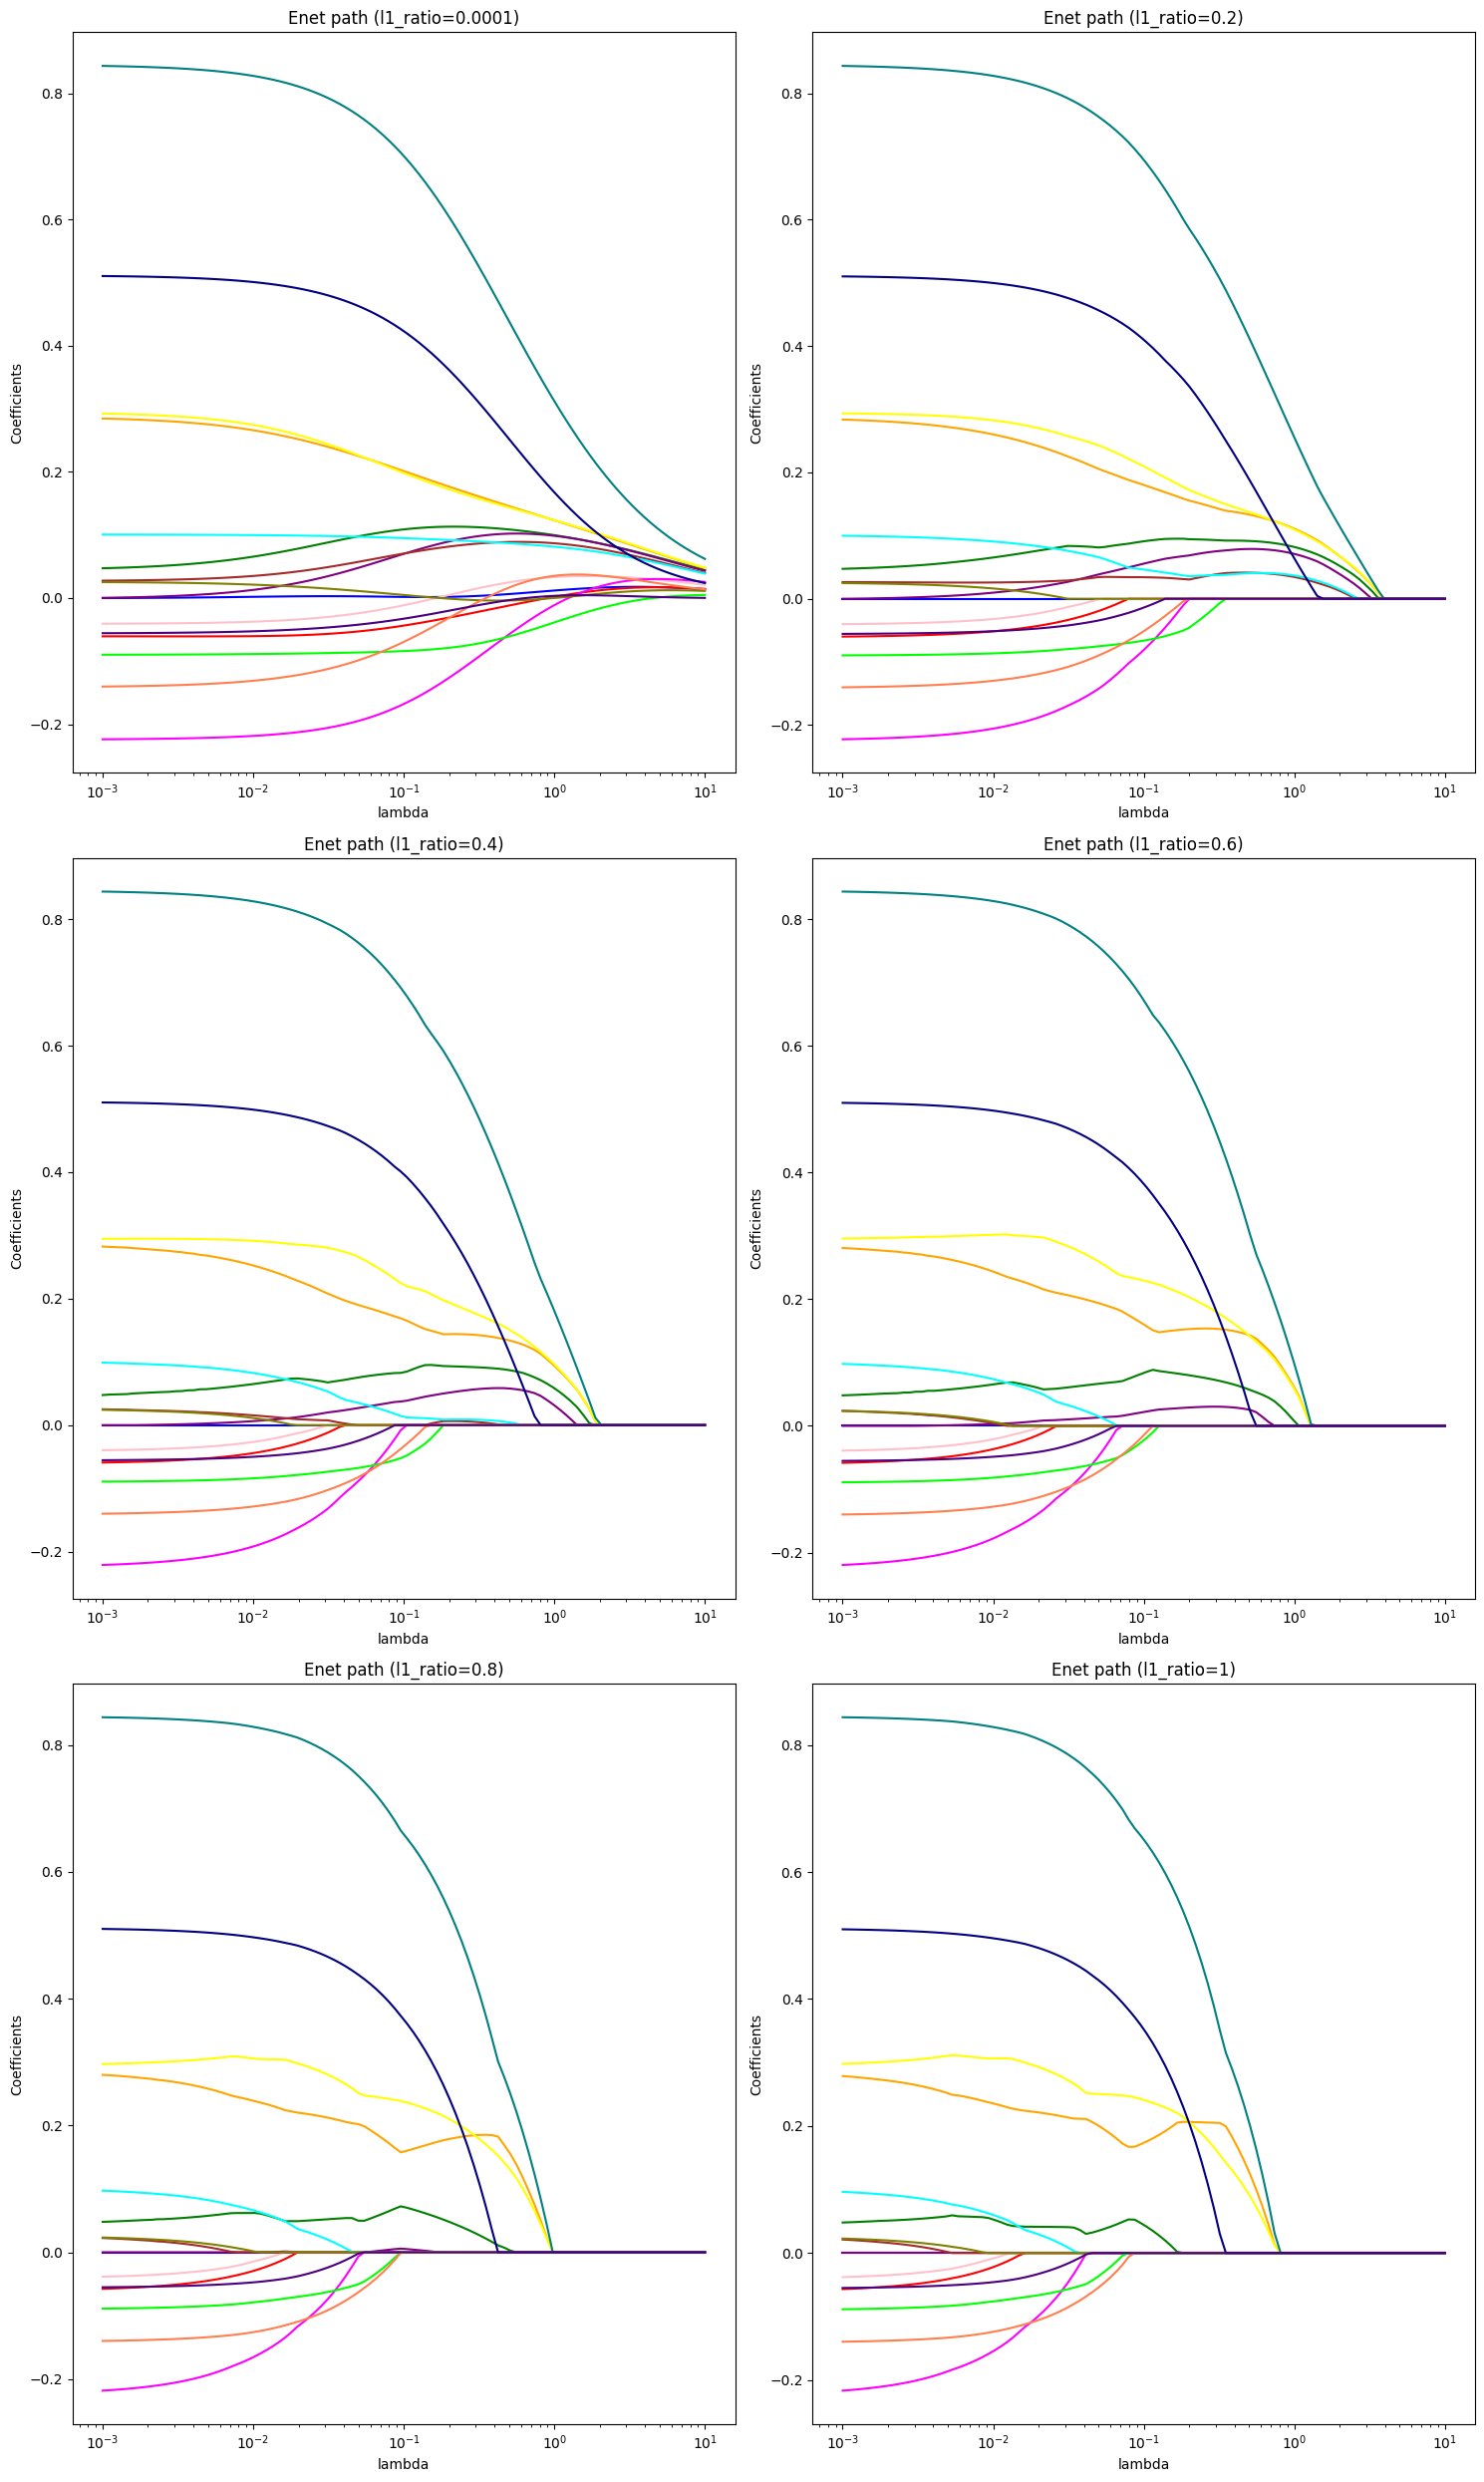

In [39]:
fig, axs = plt.subplots(3, 2, figsize=(15, 25))  # Criando 6 subplots
axs = axs.ravel()  # Transformando em um array unidimensional para facilitar a iteração

colors = ["blue", "red", "green", "orange", "purple", "pink", "brown", "yellow",
          "cyan", "magenta", "olive", "lime", "teal", "coral", "navy", "indigo", "gold"]

for i, (ratio, alphas, coefs_l) in enumerate(zip(ratios, alp, coefs)):
    for coef_l, c in zip(coefs_l, colors):
        axs[i].plot(alphas, coef_l, color=c)
    axs[i].set_xscale('log')
    axs[i].set_xlabel('lambda')
    axs[i].set_ylabel('Coefficients')
    axs[i].set_title(f'Enet path (l1_ratio={ratio})')

plt.tight_layout()
plt.show()


<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    From the graphs, we can observe the transition between a pure Ridge model (ratio = 0) and a pure Lasso model (ratio = 1). Initially, the coefficients decrease as alpha increases but only start reaching zero after Lasso is introduced. This decline is smooth for small ratios but becomes more abrupt for higher ratios.
  </p>
</div>